In [1]:
# Import Dependencies
import pandas as pd
import numpy as np

# Import Viz
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read in csv
df = pd.read_csv("Resources/Amazon Sale Report.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
#Evaluate data
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

(128976, 21)

In [4]:
# drop nulls nulls
df = df.drop(["New", "PendingS"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
#Check for null values
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [10]:
# Drop null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               37514 non-null  int64  
 1   Order_ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales_Channel       37514 non-null  object 
 6   ship-service-level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier_Status      37514 non-null  object 
 10  Quantity            37514 non-null  int64  
 11  currency            37514 non-null  object 
 12  Amount              37514 non-null  float64
 13  ship-city           37514 non-null  object 
 14  ship-state          37514 non-null  object 
 15  ship-postal-code    37514 non-null  float64
 16  ship-cou

In [7]:
#Rename Qty to Quantity
df.rename(columns={"Qty": "Quantity"}, inplace=True)
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606.0,IN,False,Easy Ship


In [12]:
# Dot notation
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.head()

,index,Order_ID,Date,Status,Fulfilment,Sales_Channel,ship_service_level,Category,Size,Courier_Status,Quantity,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,B2B,fulfilled_by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606.0,IN,False,Easy Ship


In [23]:
# Change dtypes
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,index,Order_ID,Date,Status,Fulfilment,Sales_Channel,ship_service_level,Category,Size,Courier_Status,Quantity,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,B2B,fulfilled_by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606.0,IN,False,Easy Ship


In [41]:
# Make a dataframe grouped by size
size_df = df.groupby("Size").Quantity.sum()
size_df = pd.DataFrame(size_df)
size_df = size_df.sort_values(by='Quantity', ascending=False)
size_df

,Quantity
Size,
M,5905
L,5795
XL,5481
XXL,4465
3XL,3972
S,3896
XS,2191
Free,467
6XL,170


In [51]:
list(size_df.index)

['M', 'L', 'XL', 'XXL', '3XL', 'S', 'XS', 'Free', '6XL', '5XL', '4XL']

Text(0, 0.5, 'Quantity')

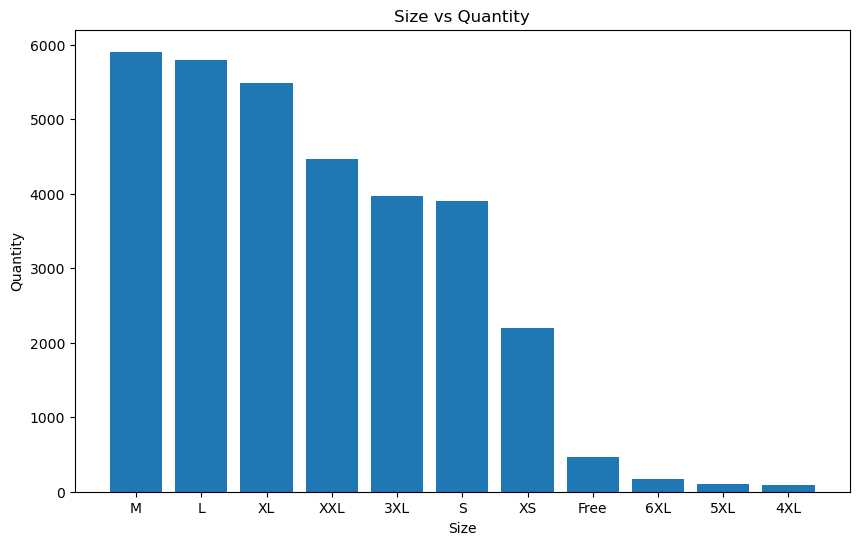

In [53]:
# Viz
x = list(size_df.index)
y = size_df.Quantity
plt.figure(figsize=(10,6))
plt.bar(x, y)
plt.title("Size vs Quantity")
plt.xlabel("Size")
plt.ylabel("Quantity")

In [57]:
# Make a dataframe grouped by category
category_df = df.groupby("Category").Quantity.sum()
category_df = pd.DataFrame(category_df)
category_df = category_df.sort_values(by='Quantity', ascending=True)
category_df

,Quantity
Category,
Shoes,25
Socks,160
Wallet,187
Perfume,255
Trousers,2169
Blazzer,5881
Shirt,11715
T-shirt,12147


Text(0, 0.5, 'Category')

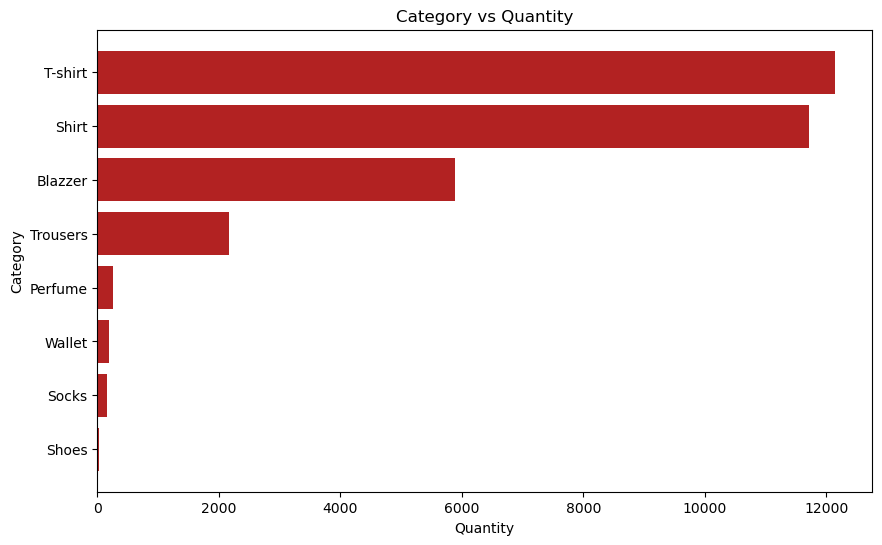

In [97]:
# Viz Category vs Quantity
x = list(category_df.index)
y = category_df.Quantity
plt.figure(figsize=(10,6))
plt.barh(x, y, color="firebrick")
plt.title("Category vs Quantity")
plt.xlabel("Quantity")
plt.ylabel("Category")

In [61]:
df.head()

,index,Order_ID,Date,Status,Fulfilment,Sales_Channel,ship_service_level,Category,Size,Courier_Status,Quantity,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,B2B,fulfilled_by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606.0,IN,False,Easy Ship


In [100]:
#filter for cancelled deliveries
df_filtered = df[df['Status'] != "Cancelled"]
df_filtered.shape

(32383, 19)

In [102]:
# Top 10 states that generate the most revenue (filterd for cancelled deliveries)
state_income = df_filtered.groupby("ship_state").Amount.sum()
state_income = pd.DataFrame(state_income)
state_income = state_income.sort_values(by='Amount', ascending=False).head(10)
state_income

,Amount
ship_state,
MAHARASHTRA,3432940.0
KARNATAKA,2516456.0
UTTAR PRADESH,1929618.0
TELANGANA,1760587.0
TAMIL NADU,1642505.0
KERALA,1186419.0
DELHI,1128086.0
WEST BENGAL,884522.0
ANDHRA PRADESH,881778.0


In [109]:
state_income.values

array([[3432940.],
       [2516456.],
       [1929618.],
       [1760587.],
       [1642505.],
       [1186419.],
       [1128086.],
       [ 884522.],
       [ 881778.],
       [ 792104.]])

In [ ]:
[3432940, 2516456, 1929618 , 1760587, 1642505, 1186419, 1128086, 884522, 881778, 792104]

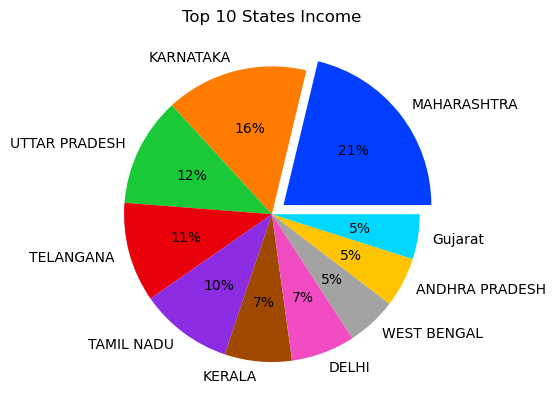

In [110]:
# declaring data 
data = [3432940, 2516456, 1929618 , 1760587, 1642505, 1186419, 1128086, 884522, 881778, 792104]
keys = list(state_income.index)

# declaring exploding pie 
explode = [0.1, 0] + [0] * (len(data) - 2)
  
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%') 
  
# displaying chart 
plt.title("Top 10 States Income")
plt.show() 

In [111]:
# Top 10 states that generate the most revenue
state_income2 = df.groupby("ship_state").Amount.sum()
state_income2 = pd.DataFrame(state_income2)
state_income2 = state_income2.sort_values(by='Amount', ascending=False).head(10)
state_income2

,Amount
ship_state,
MAHARASHTRA,3904425.05
KARNATAKA,2843433.22
UTTAR PRADESH,2252247.08
TELANGANA,2033479.08
TAMIL NADU,1916318.30
KERALA,1398141.58
DELHI,1283282.97
ANDHRA PRADESH,1051875.86
WEST BENGAL,1035724.82


In [112]:
state_income2.values

array([[3904425.05],
       [2843433.22],
       [2252247.08],
       [2033479.08],
       [1916318.3 ],
       [1398141.58],
       [1283282.97],
       [1051875.86],
       [1035724.82],
       [ 901852.82]])

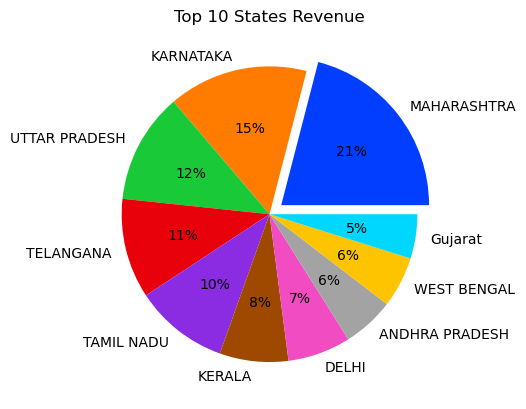

In [113]:
# declaring data 
data = [3904425.05, 2843433.22, 2252247.08, 2033479.08, 1916318.3, 1398141.58, 1283282.97, 1051875.86, 1035724.82, 901852.82]
keys = list(state_income2.index)

# declaring exploding pie 
explode = [0.1, 0] + [0] * (len(data) - 2)
  
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%') 
  
# displaying chart 
plt.title("Top 10 States Revenue")
plt.show() 

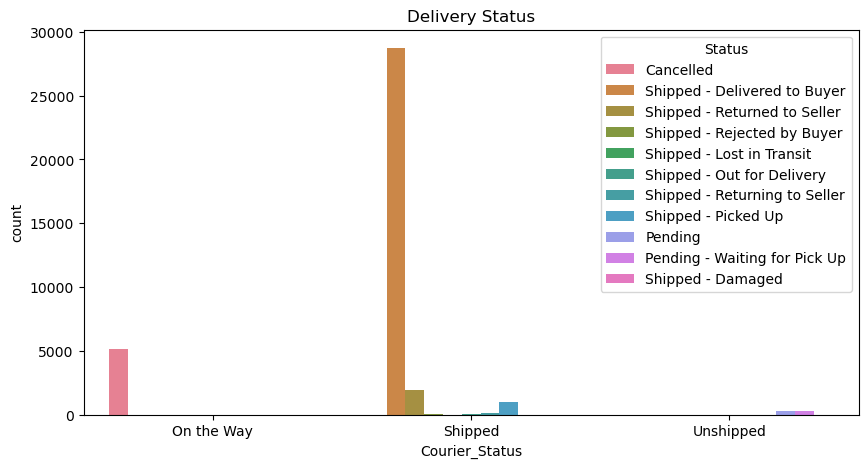

In [96]:
# Delivery Status
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df, x='Courier_Status', hue='Status')
plt.title("Delivery Status")
plt.show()